# Systemy inspekcji wizualnej  
## Laboratorium  2
Temat: Wczytywanie, wyświetlanie i zapisywanie obrazów i sekwencji obrazów w bibliotece OpenCV. 

Instrukcję opracował: dr inż. Łukasz Jeleń  
  
Wrocław 2022

---

Nazwisko i Imię:  Pelar Paweł  
Nr albumu:  243480  
data wykonania ćwiczenia: 22.10.2023 

w celu zachowania przeniesienia do kolejnej linii należy się upewnić, że na końcu linii znajduje się 2x spacja

***

# 1. Narzędzia

Na zjaęciach będziemy korzystali z pythnona, który jest stosounkowo prostym językiem programowania. Mają Państwo do wyboru korzystanie z Google Colab (https://colab.research.google.com) - wersja online, lub Anaconda Navigator (https://www.anaconda.com/) - wymaga instalacji na własnym komputerze. Są to oczywiście tylko propozycje. 

# 2. Zadania wprowadzające

## Zadanie 1

Wczytaj jeden z przykładowych obrazów z eportalu i wyświetl go z zastosowaniem biblioteki matplotlib.

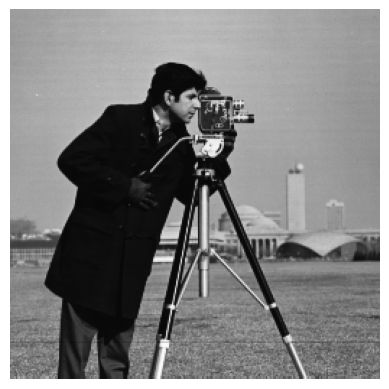

In [137]:
#tutaj dodaj swój kod. W rezi potrzeby dodaj więcej komórek z kodem
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def display_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

img = "Cameraman.tif"
display_image(img)


## Zadanie 2

Wczytaj obraz i rozdziel go na trzy składowe: R, G i B, a następnie wyświetl każdy kanał w osobnej komórce

In [138]:
#Wczytaj obraz
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    img = cv2.imread(image_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


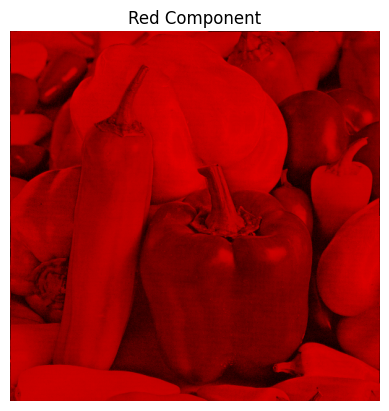

In [139]:
#R
def display_red_component(img_rgb, save_path=None):
    r, _, _ = cv2.split(img_rgb)
    red_image = cv2.merge((r, r*0, r*0))
    plt.imshow(red_image)
    plt.title('Red Component')
    plt.axis('off')
    plt.show()
    
    if save_path:
        cv2.imwrite(save_path, cv2.cvtColor(red_image, cv2.COLOR_RGB2BGR))

display_red_component(load_image("PeppersRGB.tif"))

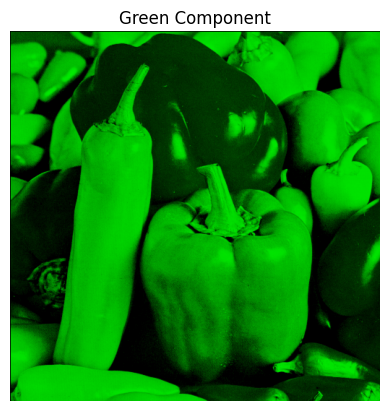

In [140]:
#G
def display_green_component(img_rgb, save_path=None):
    _, g, _ = cv2.split(img_rgb)
    green_image = cv2.merge((g*0, g, g*0))
    plt.imshow(green_image)
    plt.title('Green Component')
    plt.axis('off')
    plt.show()
    
    if save_path:
        cv2.imwrite(save_path, cv2.cvtColor(green_image, cv2.COLOR_RGB2BGR))

display_green_component(load_image("PeppersRGB.tif"))

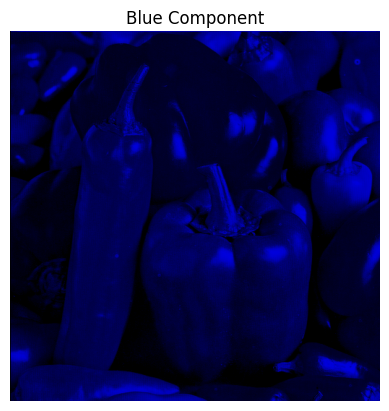

In [141]:
#B
def display_blue_component(img_rgb, save_path=None):
    _, _, b = cv2.split(img_rgb)
    blue_image = cv2.merge((b*0, b*0, b))
    plt.imshow(blue_image)
    plt.title('Blue Component')
    plt.axis('off')
    plt.show()
    
    if save_path:
        cv2.imwrite(save_path, cv2.cvtColor(blue_image, cv2.COLOR_RGB2BGR))

display_blue_component(load_image("PeppersRGB.tif"))

## Zadanie 3

Korzystając z obrazów na eportalu zapoznaj się z funkcjami umożliwiającymi zmianę rozmiaru obrazu
(skalowanie), obrót obrazu i przycięcia obrazu. 

In [142]:
import cv2

def process_image(path, new_width=None, rotation_angle=0, crop=None):
    image = cv2.imread(path)

    if crop:
        x1, y1, x2, y2 = crop
        image = image[y1:y2, x1:x2]
    
    if new_width:
        ratio = new_width / image.shape[1]
        new_dimensions = (new_width, int(image.shape[0] * ratio))
        image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_AREA)
    
    if rotation_angle:
        height, width = image.shape[:2]
        center = (width / 2, height / 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, rotation_angle, 1)
        image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    return image

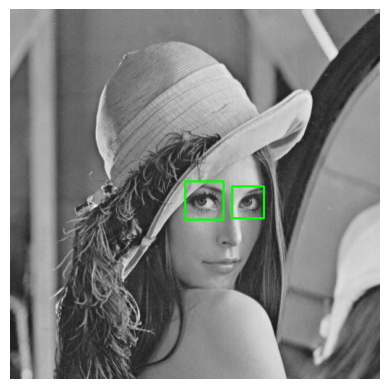

[[217 205 172 172]]
[[90 40 44 44]
 [25 33 53 53]]


In [143]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

gif_image = Image.open('lena.gif')

png_path = 'lena.png'
gif_image.save(png_path)
image = cv2.imread(png_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_image, 1.3, 5)
for (x,y,w,h) in faces:
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print(faces)
print(eyes)


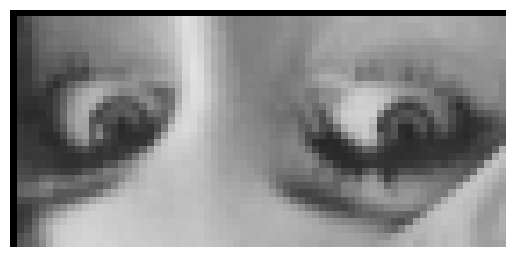

In [144]:
image = process_image("lena.png", crop=(217 + 25, 205 + 33, 217 + 90 + 44, 205 + 33 + 53), rotation_angle=180, new_width=69)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Zadanie 4

wczytaj zdjęcie kolorowe i zamień je na obraz w odcieniach szarości

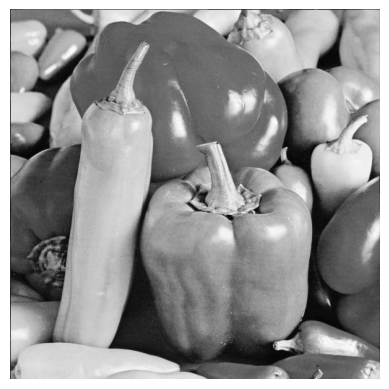

In [145]:
import cv2
import matplotlib.pyplot as plt


image_path = 'PeppersRGB.tif'
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


## Zadanie 5

Obraz z zadania 4 zamień na obraz binarny. 

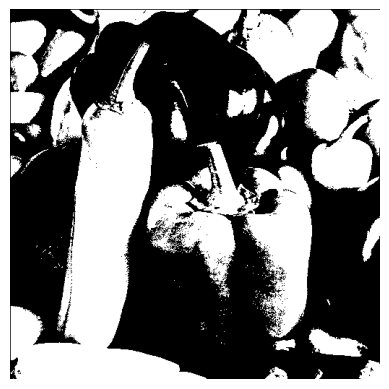

In [146]:
_, binary_image = cv2.threshold(gray_image, 137, 215, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()


## Zadanie 6

Wczytaj obraz ’cameraman.tif’ i wyświetl jego histogram oraz zdjęcie. 

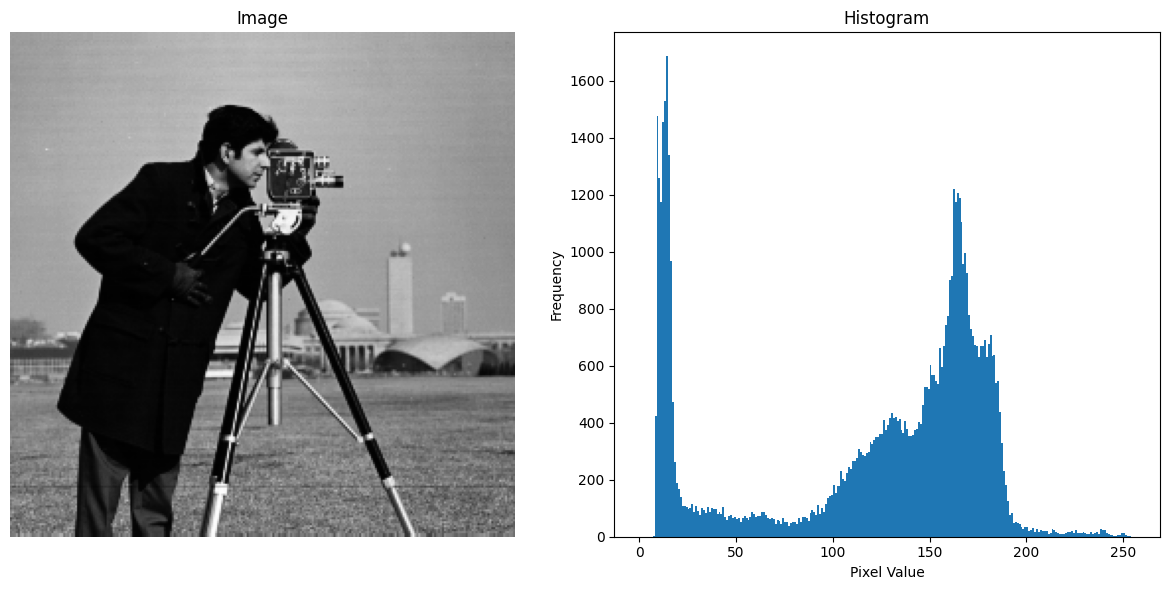

In [147]:
image_path = 'Cameraman.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Image')

plt.subplot(1, 2, 2)
plt.hist(image.ravel(), 256, [0,256])
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 3. Więcej zadań

## Zadanie 1

Utwórz zdjęcie sytntetyczne jak na przykładzie i zapisz je na dysku.  
  
  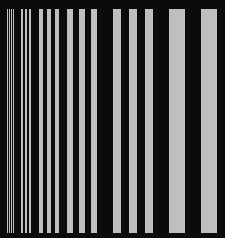

C:\Users\pawel\AppData\Local\Temp\ipykernel_21604\2394057808.py:13: RuntimeWarning: overflow encountered in multiply
  Z = Z*Z + X + 1j*Y
C:\Users\pawel\AppData\Local\Temp\ipykernel_21604\2394057808.py:13: RuntimeWarning: invalid value encountered in multiply
  Z = Z*Z + X + 1j*Y


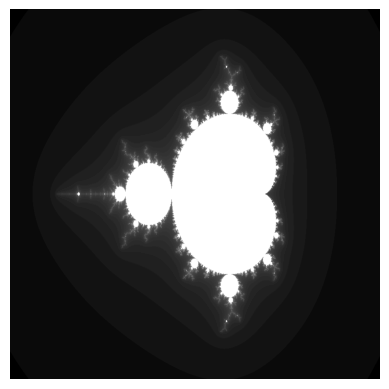

In [148]:
import numpy as np
import matplotlib.pyplot as plt

def generate_mandelbrot(width, height, max_iter=1000):
    """Generate a Mandelbrot set image of specified size."""
    x = np.linspace(-2.5, 1.5, width)
    y = np.linspace(-1.5, 1.5, height)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X, dtype=np.complex64)
    img = np.zeros(X.shape, dtype=float)
    
    for i in range(max_iter):
        Z = Z*Z + X + 1j*Y
        mask = np.abs(Z) < 1000
        img += mask
    
    img = np.log(img + 1)
    img = img / np.max(img)
    
    return img

def save_image(image, filename):
    """Save the given image to a file."""
    plt.imsave(filename, image, cmap='gray')

width, height = 800, 800
mandelbrot_img = generate_mandelbrot(width, height)

save_image(mandelbrot_img, 'mandelbrot_fractal_gray.png')

plt.imshow(mandelbrot_img, cmap='gray')
plt.axis('off')
plt.show()


## Zadanie 2

Bazując na utworzonym zdjęciu w zadaniu 1 napisz kod pozwalający na zamianę losowych pikseli na kolor biały (jeżeli kolor piksela jest czarny) i czarny (jeśli kolor piksela jest szary lub biały)

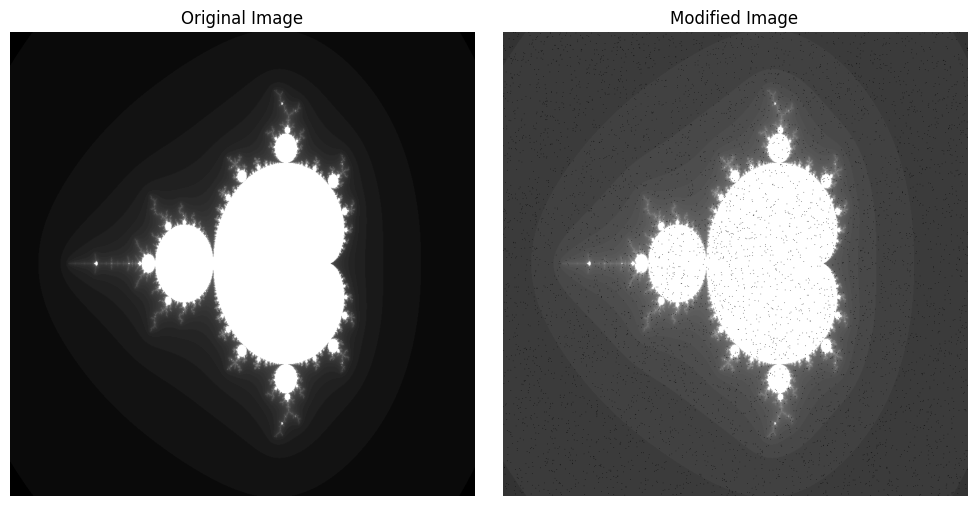

In [149]:
import numpy as np
import matplotlib.pyplot as plt

def random_pixel_change(image, probability=0.01):
    """
    Change random pixels based on the conditions:
    - If pixel is black (0), change it to white (1).
    - If pixel is gray or white, change it to black (0).
    """
    random_mask = np.random.rand(*image.shape) < probability
    
    black_to_white = np.logical_and(image == 0, random_mask)
    image[black_to_white] = 1
    
    gray_or_white_to_black = np.logical_and(image > 0, random_mask)
    image[gray_or_white_to_black] = 0

    return image

image = mandelbrot_img
modified_image = random_pixel_change(image.copy())

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(modified_image, cmap='gray')
ax[1].set_title('Modified Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()


## Zadanie 3

Dla obrazów tarczy dostępnych na eportalu dokonaj analizy, która pozwoli określić, czy jedna z tarcz jest uszkodzona -> dokonaj odejmowania obrazów. 

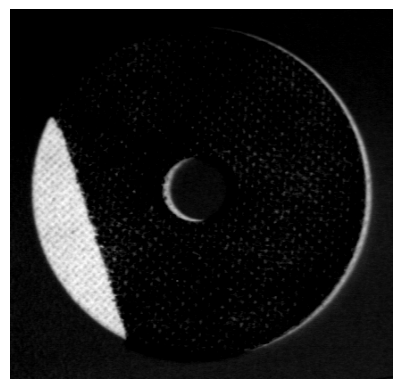

In [150]:
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('grinder_cut.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('grinder_good.bmp', cv2.IMREAD_GRAYSCALE)

if image1.shape != image2.shape:
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

subtracted_image = cv2.subtract(image1, image2)

plt.imshow(subtracted_image, cmap='gray')
plt.axis('off')
plt.show()
